In [16]:
#Importações das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

#Ignorar avisos
warnings.filterwarnings("ignore")

In [17]:
# Carregar os datasets
print("Carregando dados...")
transactions = pd.read_csv("../transactions.csv")
customers = pd.read_csv("../customers.csv")
products = pd.read_csv("../products.csv")


Carregando dados...


In [18]:
# Com esse comando conseguimos verificar qual o tipo de dado de cada coluna.
print(transactions.dtypes, '\n')

print(customers.dtypes, '\n')

print(products.dtypes, '\n')

transaction_id        int64
customer_id           int64
product_id            int64
transaction_date     object
quantity              int64
price               float64
total_value         float64
dtype: object 

customer_id           int64
age                   int64
gender               object
city                 object
registration_date    object
phone_number         object
dtype: object 

product_id       int64
category        object
price          float64
partnership     object
dtype: object 



In [19]:
# Converter tipos de dados
transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])
customers["registration_date"] = pd.to_datetime(customers["registration_date"])

In [20]:
# Merge dos dataframes
df = transactions.merge(products, on="product_id", how="left")
df = df.merge(customers, on="customer_id", how="left")

df.head()

,transaction_id,customer_id,product_id,transaction_date,quantity,price_x,total_value,category,price_y,partnership,age,gender,city,registration_date,phone_number
0,1244273,35981,333,2021-01-01,1,415.53,415.53,Casa,415.53,Partner_A,69,Other,Rio de Janeiro,2019-02-10,(31) 96967-8127
1,212802,54995,282,2021-01-01,4,332.27,1329.08,Moda,332.27,Partner_C,59,Female,Porto Alegre,2018-12-14,(21) 99360-5246
2,1598055,21228,478,2021-01-01,2,92.21,184.42,Moda,92.21,Partner_C,64,Female,São Paulo,2020-12-17,(11) 95934-9756
3,2219068,480672,11,2021-01-01,3,282.79,848.37,Moda,282.79,Partner_C,64,Other,Rio de Janeiro,2019-11-16,(81) 99350-9984
4,952766,151706,14,2021-01-01,2,475.22,950.44,Casa,475.22,Partner_A,59,Male,Rio de Janeiro,2019-09-27,(31) 92498-4566


In [21]:
df = df.drop(columns=['price_x'])
df.head()

,transaction_id,customer_id,product_id,transaction_date,quantity,total_value,category,price_y,partnership,age,gender,city,registration_date,phone_number
0,1244273,35981,333,2021-01-01,1,415.53,Casa,415.53,Partner_A,69,Other,Rio de Janeiro,2019-02-10,(31) 96967-8127
1,212802,54995,282,2021-01-01,4,1329.08,Moda,332.27,Partner_C,59,Female,Porto Alegre,2018-12-14,(21) 99360-5246
2,1598055,21228,478,2021-01-01,2,184.42,Moda,92.21,Partner_C,64,Female,São Paulo,2020-12-17,(11) 95934-9756
3,2219068,480672,11,2021-01-01,3,848.37,Moda,282.79,Partner_C,64,Other,Rio de Janeiro,2019-11-16,(81) 99350-9984
4,952766,151706,14,2021-01-01,2,950.44,Casa,475.22,Partner_A,59,Male,Rio de Janeiro,2019-09-27,(31) 92498-4566


In [22]:
df.isnull().sum()

transaction_id       0
customer_id          0
product_id           0
transaction_date     0
quantity             0
total_value          0
category             0
price_y              0
partnership          0
age                  0
gender               0
city                 0
registration_date    0
phone_number         0
dtype: int64

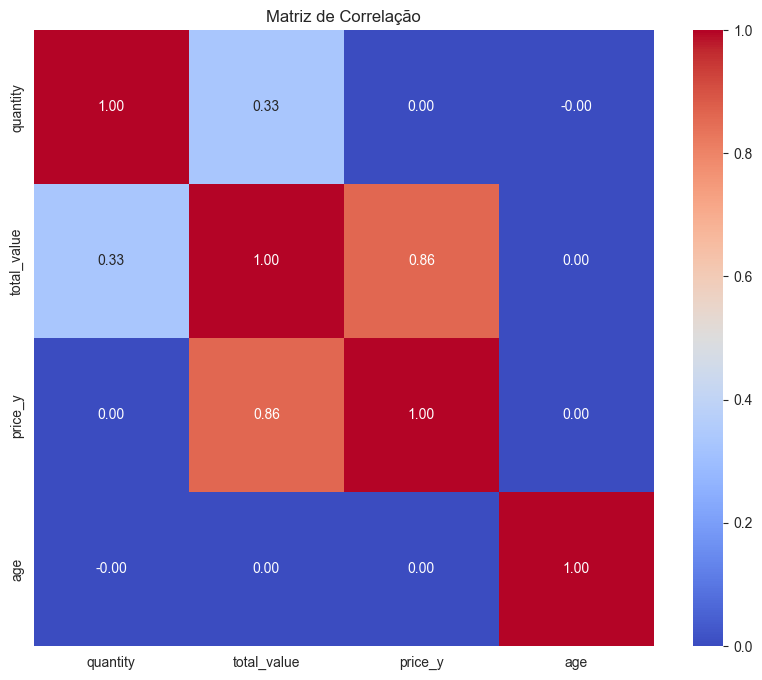

In [23]:
correlacao = df.drop(columns=['transaction_id','customer_id','product_id'])
correlacao = correlacao.select_dtypes(include=['number']).corr()
# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [24]:
# Calcular receita da plataforma
def calculate_platform_revenue(row):
    if row["category"] == "Eletrônicos":
        return row["total_value"] * 0.01
    elif row["category"] in ["Esportes", "Livros"]:
        return row["total_value"] * 0.03
    elif row["category"] == "Casa":
        return row["total_value"] * 0.04
    elif row["category"] == "Moda":
        return 10.00 * row["quantity"]
    return 0

#calculando a receita da plataforma
df["receita_plataforma"] = df.apply(calculate_platform_revenue, axis=1)

df.head()

,transaction_id,customer_id,product_id,transaction_date,quantity,total_value,category,price_y,partnership,age,gender,city,registration_date,phone_number,receita_plataforma
0,1244273,35981,333,2021-01-01,1,415.53,Casa,415.53,Partner_A,69,Other,Rio de Janeiro,2019-02-10,(31) 96967-8127,16.6212
1,212802,54995,282,2021-01-01,4,1329.08,Moda,332.27,Partner_C,59,Female,Porto Alegre,2018-12-14,(21) 99360-5246,40.0000
2,1598055,21228,478,2021-01-01,2,184.42,Moda,92.21,Partner_C,64,Female,São Paulo,2020-12-17,(11) 95934-9756,20.0000
3,2219068,480672,11,2021-01-01,3,848.37,Moda,282.79,Partner_C,64,Other,Rio de Janeiro,2019-11-16,(81) 99350-9984,30.0000
4,952766,151706,14,2021-01-01,2,950.44,Casa,475.22,Partner_A,59,Male,Rio de Janeiro,2019-09-27,(31) 92498-4566,38.0176


## Parte 1: Análise Exploratória de Dados (AED)
Nesta seção, exploramos os dados para responder às seguintes questões de negócio:

* Quais categorias de produtos apresentam maior ticket médio, volume e valor de vendas?
* Qual categoria traz maior receita própria para a plataforma?
* Em que cidades se concentram os maiores valores de vendas?
* Quais parceiros são responsáveis pelos maiores volumes de vendas e receita?
* Quais outras métricas podem ser usadas para avaliar a performance do negócio?

In [26]:
# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


print(f"Período: {transactions['transaction_date'].min()} a {transactions['transaction_date'].max()}")


# ============================================
# ANÁLISE 1: CATEGORIAS
# ============================================
print("\n" + "="*60)
print("ANÁLISE 1: CATEGORIAS DE PRODUTOS")
print("="*60)

analise_categoria = df.groupby('category').agg({
    'transaction_id': 'count',
    'total_value': 'sum',
    'receita_plataforma': 'sum'
}).round(2)

analise_categoria.columns = ['Volume_Vendas', 'Valor_Total_Vendas', 'Receita_Plataforma']
analise_categoria['Ticket_Medio'] = (analise_categoria['Valor_Total_Vendas'] / analise_categoria['Volume_Vendas']).round(2)
analise_categoria = analise_categoria.sort_values('Valor_Total_Vendas', ascending=False)

print("\nMétricas por Categoria:")
print(category_analysis)

print(f"\n✓ Maior Ticket Médio: {analise_categoria['Ticket_Medio'].idxmax()} (R$ {analise_categoria['Ticket_Medio'].max():,.2f})")
print(f"✓ Maior Volume de Vendas: {analise_categoria['Volume_Vendas'].idxmax()} ({analise_categoria['Volume_Vendas'].max():,} transações)")
print(f"✓ Maior Valor Transacionado: {analise_categoria['Valor_Total_Vendas'].idxmax()} (R$ {analise_categoria['Valor_Total_Vendas'].max():,.2f})")
print(f"✓ Maior Receita para Plataforma: {analise_categoria['Receita_Plataforma'].idxmax()} (R$ {analise_categoria['Receita_Plataforma'].max():,.2f})")

# ============================================
# ANÁLISE 2: CIDADES
# ============================================
print("\n" + "="*60)
print("ANÁLISE 2: CONCENTRAÇÃO POR CIDADE")
print("="*60)

analise_cidade = df.groupby('city').agg({
    'total_value': 'sum',
    'transaction_id': 'count',
    'receita_plataforma': 'sum'
}).round(2)

analise_cidade.columns = ['Valor_Total_Vendas', 'Volume_Vendas', 'Receita_Plataforma']
analise_cidade = analise_cidade.sort_values('Valor_Total_Vendas', ascending=False)

print("\nTop Cidades por Valor de Vendas:")
print(analise_cidade.head(10))

# ============================================
# ANÁLISE 3: PARCEIROS
# ============================================
print("\n" + "="*60)
print("ANÁLISE 3: PERFORMANCE DOS PARCEIROS")
print("="*60)

analise_parceiro = df.groupby('partnership').agg({
    'transaction_id': 'count',
    'total_value': 'sum',
    'receita_plataforma': 'sum'
}).round(2)

analise_parceiro.columns = ['Volume_Vendas', 'Valor_Total_Vendas', 'Receita_Plataforma']
analise_parceiro = analise_parceiro.sort_values('Volume_Vendas', ascending=False)

print("\nMétricas por Parceiro:")
print(analise_parceiro)

print(f"\n✓ Maior Volume de Vendas: {analise_parceiro['Volume_Vendas'].idxmax()} ({analise_parceiro['Volume_Vendas'].max():,} transações)")
print(f"✓ Maior Receita para Plataforma: {analise_parceiro['Receita_Plataforma'].idxmax()} (R$ {analise_parceiro['Receita_Plataforma'].max():,.2f})")

# ============================================
# ANÁLISE 4: MÉTRICAS ADICIONAIS
# ============================================
print("\n" + "="*60)
print("ANÁLISE 4: MÉTRICAS ADICIONAIS DE PERFORMANCE")
print("="*60)

# Taxa de recompra
volume_compra = df.groupby('customer_id')['transaction_id'].count()
recompra_cliente = (volume_compra > 1).sum()
total_cliente = df['customer_id'].nunique()
taxa_repeticao = (recompra_cliente / total_cliente) * 100

print(f"\n1. Taxa de Recompra:")
print(f"   - Clientes que compraram: {total_cliente:,}")
print(f"   - Clientes que recompraram: {recompra_cliente:,}")
print(f"   - Taxa de recompra: {taxa_repeticao:.2f}%")

# Frequência média de compra
media_compra = volume_compra.mean()
print(f"\n2. Frequência de Compra:")
print(f"   - Média de compras por cliente: {media_compra:.2f}")
print(f"   - Mediana de compras por cliente: {volume_compra.median():.0f}")

# Análise temporal
df['year_month'] = df['transaction_date'].dt.to_period('M')
vendas_mensais = df.groupby('year_month').agg({
    'total_value': 'sum',
    'transaction_id': 'count',
    'receita_plataforma': 'sum'
})

print(f"\n3. Crescimento Temporal:")
print(f"   - Período analisado: {df['transaction_date'].min().strftime('%Y-%m-%d')} a {df['transaction_date'].max().strftime('%Y-%m-%d')}")
print(f"   - Vendas mensais médias: R$ {vendas_mensais['total_value'].mean():,.2f}")
print(f"   - Receita mensal média da plataforma: R$ {vendas_mensais['receita_plataforma'].mean():,.2f}")

# Mix de produtos
mix_categorias = df.groupby('category')['transaction_id'].count()
mix_categorias_porcentagem = (category_mix / category_mix.sum() * 100).round(2)

print(f"\n4. Mix de Produtos (% do volume):")
for categoria, porcentagem in mix_categorias_porcentagem.sort_values(ascending=False).items():
    print(f"   - {categoria}: {porcentagem}%")


print("\n" + "="*60)
print("Análise exploratória concluída!")
print("="*60)


Período: 2021-01-01 00:00:00 a 2024-12-31 00:00:00

ANÁLISE 1: CATEGORIAS DE PRODUTOS

Métricas por Categoria:
             Volume_Vendas  Valor_Total_Vendas  Receita_Plataforma  \
category                                                             
Eletrônicos         302593        2.096041e+09         20960405.98   
Esportes            585780        1.580282e+09         47408463.50   
Casa                564365        7.809026e+08         31236105.48   
Moda               1211223        7.489521e+08         30298270.00   
Livros              336039        1.768233e+08          5304698.08   

             Ticket_Medio  
category                   
Eletrônicos       6926.93  
Esportes          2697.74  
Casa              1383.68  
Moda               618.34  
Livros             526.20  

✓ Maior Ticket Médio: Eletrônicos (R$ 6,926.93)
✓ Maior Volume de Vendas: Moda (1,211,223 transações)
✓ Maior Valor Transacionado: Eletrônicos (R$ 2,096,040,598.13)
✓ Maior Receita para Plataforma: Esp

Criando visualização 1: Análise por Categoria...
Criando visualização 2: Análise por Cidade...
Criando visualização 3: Análise por Parceiro...
Criando visualização 5: Heatmap Parceiro x Categoria...


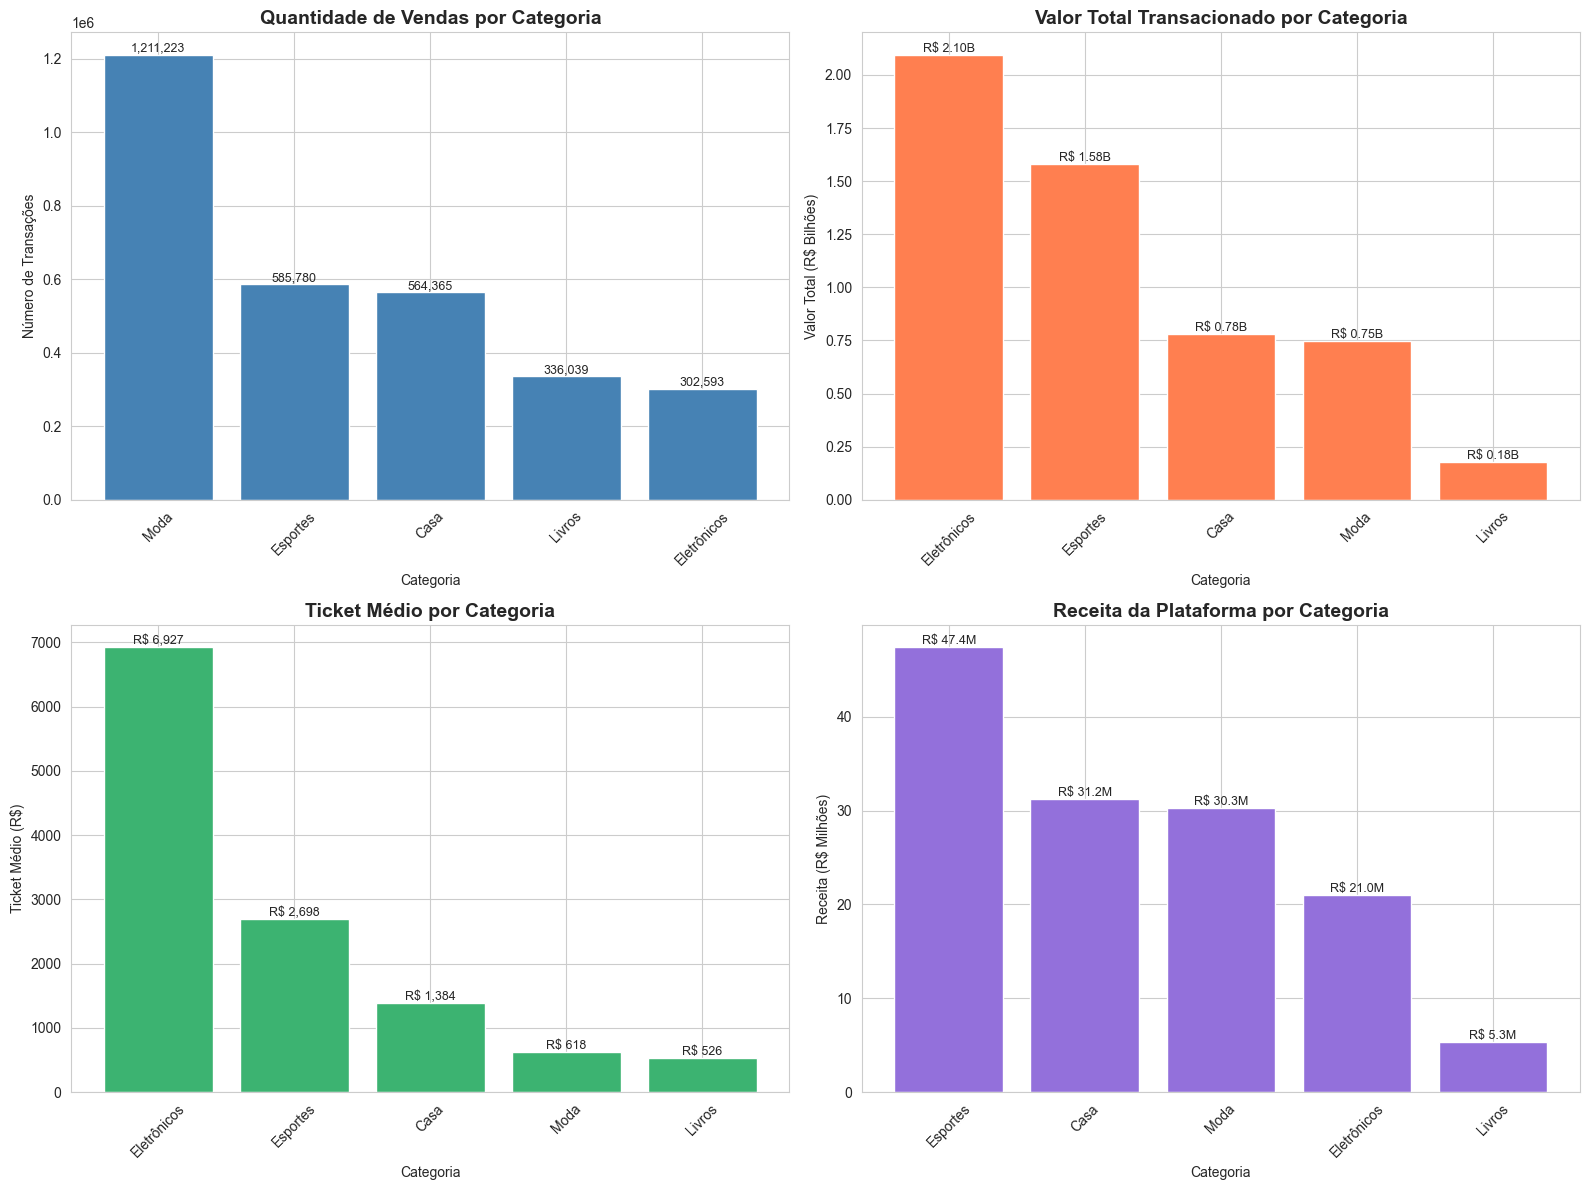

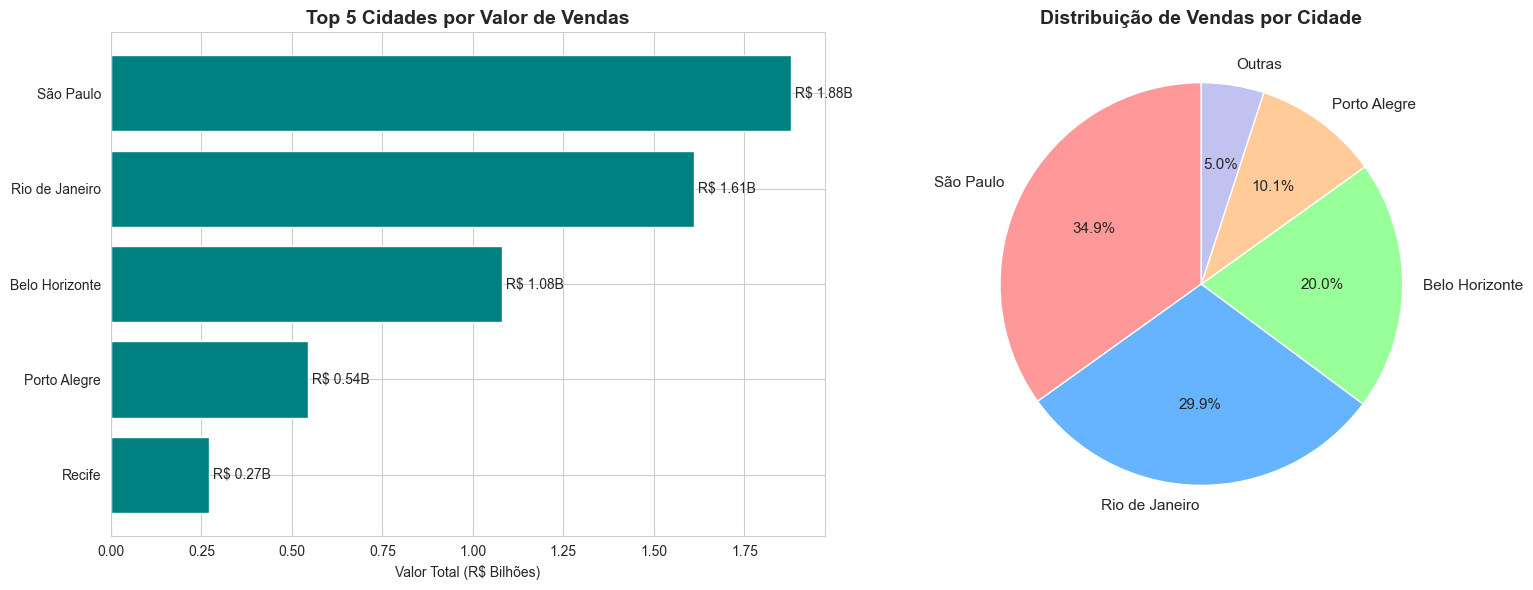

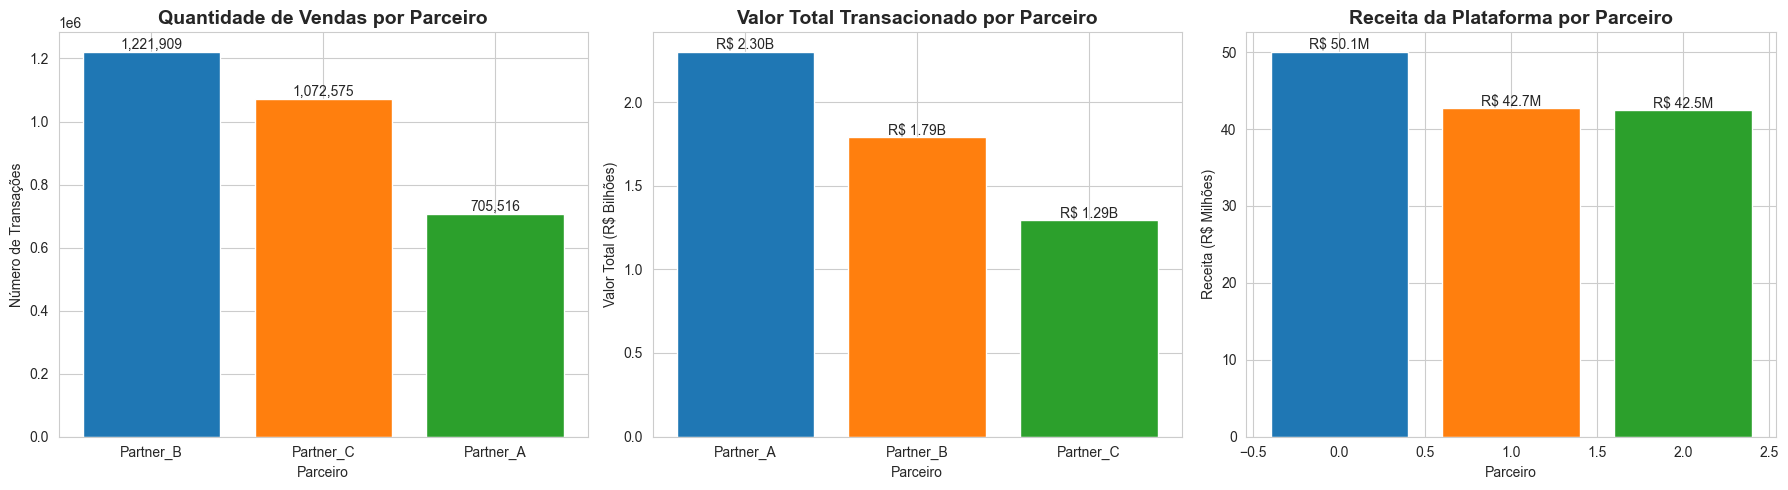

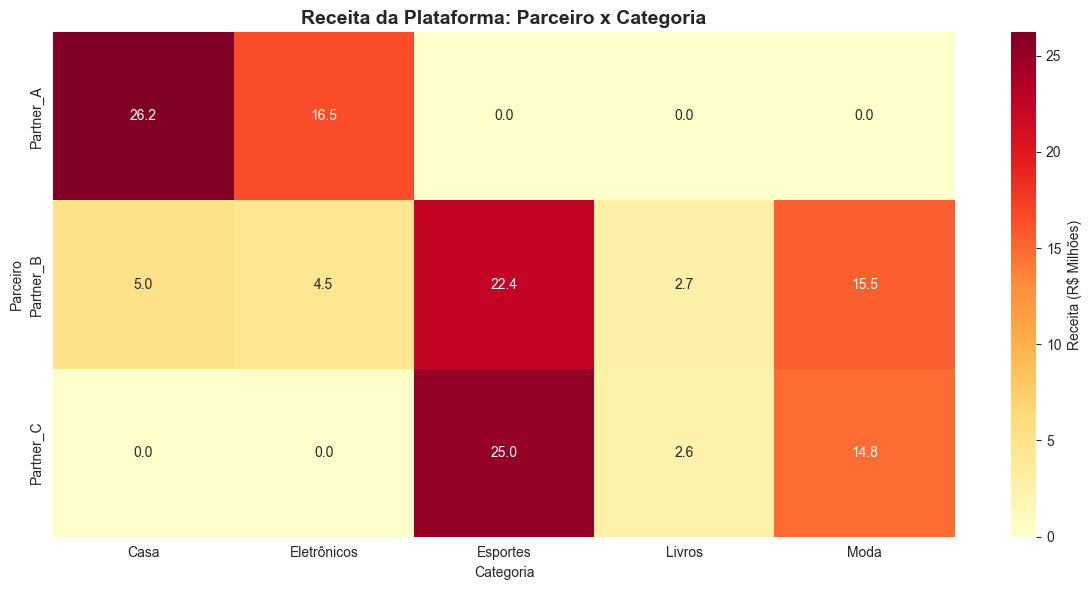

In [32]:

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


# ============================================
# VISUALIZAÇÃO 1: Análise por Categoria
# ============================================
print("Criando visualização 1: Análise por Categoria...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1.1 Volume de vendas por categoria
quantidade_categoria = df.groupby('category')['transaction_id'].count().sort_values(ascending=False)
axes[0, 0].bar(quantidade_categoria.index, quantidade_categoria.values, color='steelblue')
axes[0, 0].set_title('Quantidade de Vendas por Categoria', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Categoria')
axes[0, 0].set_ylabel('Número de Transações')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(quantidade_categoria.values):
    axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

# 1.2 Valor total transacionado por categoria
vendas_categoria = df.groupby('category')['total_value'].sum().sort_values(ascending=False) / 1e9
axes[0, 1].bar(vendas_categoria.index, vendas_categoria.values, color='coral')
axes[0, 1].set_title('Valor Total Transacionado por Categoria', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Categoria')
axes[0, 1].set_ylabel('Valor Total (R$ Bilhões)')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(vendas_categoria.values):
    axes[0, 1].text(i, v, f'R$ {v:.2f}B', ha='center', va='bottom', fontsize=9)

# 1.3 Ticket médio por categoria
ticket_categoria = df.groupby('category')['total_value'].sum() / df.groupby('category')['transaction_id'].count()
ticket_categoria = ticket_categoria.sort_values(ascending=False)
axes[1, 0].bar(ticket_categoria.index, ticket_categoria.values, color='mediumseagreen')
axes[1, 0].set_title('Ticket Médio por Categoria', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Categoria')
axes[1, 0].set_ylabel('Ticket Médio (R$)')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(ticket_categoria.values):
    axes[1, 0].text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontsize=9)

# 1.4 Receita da plataforma por categoria
receita_categoria = df.groupby('category')['receita_plataforma'].sum().sort_values(ascending=False) / 1e6
axes[1, 1].bar(receita_categoria.index, receita_categoria.values, color='mediumpurple')
axes[1, 1].set_title('Receita da Plataforma por Categoria', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Categoria')
axes[1, 1].set_ylabel('Receita (R$ Milhões)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(receita_categoria.values):
    axes[1, 1].text(i, v, f'R$ {v:.1f}M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# ============================================
# VISUALIZAÇÃO 2: Análise por Cidade
# ============================================
print("Criando visualização 2: Análise por Cidade...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2.1 Top 5 cidades por valor de vendas
vendas_cidade = df.groupby('city')['total_value'].sum().sort_values(ascending=False).head(5) / 1e9
axes[0].barh(range(len(vendas_cidade)), vendas_cidade.values, color='teal')
axes[0].set_yticks(range(len(vendas_cidade)))
axes[0].set_yticklabels(vendas_cidade.index)
axes[0].set_title('Top 5 Cidades por Valor de Vendas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Valor Total (R$ Bilhões)')
axes[0].invert_yaxis()
for i, v in enumerate(vendas_cidade.values):
    axes[0].text(v, i, f' R$ {v:.2f}B', va='center', fontsize=10)

# 2.2 Distribuição percentual por cidade
cidade_porcentagem = df.groupby('city')['total_value'].sum().sort_values(ascending=False)
top_cidades = cidade_porcentagem.head(4)
outros = pd.Series({'Outras': cidade_porcentagem[4:].sum()})
pizza_cidade = pd.concat([top_cidades, outros])

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
axes[1].pie(pizza_cidade.values, labels=pizza_cidade.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 11})
axes[1].set_title('Distribuição de Vendas por Cidade', fontsize=14, fontweight='bold')

plt.tight_layout()

# ============================================
# VISUALIZAÇÃO 3: Análise por Parceiro
# ============================================
print("Criando visualização 3: Análise por Parceiro...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 3.1 Quantidade de vendas por parceiro
quantidade_parceiro = df.groupby('partnership')['transaction_id'].count().sort_values(ascending=False)
axes[0].bar(quantidade_parceiro.index, quantidade_parceiro.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Quantidade de Vendas por Parceiro', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Parceiro')
axes[0].set_ylabel('Número de Transações')
for i, v in enumerate(quantidade_parceiro.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# 3.2 Valor total por parceiro
vendas_parceiro = df.groupby('partnership')['total_value'].sum().sort_values(ascending=False) / 1e9
axes[1].bar(vendas_parceiro.index, vendas_parceiro.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Valor Total Transacionado por Parceiro', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Parceiro')
axes[1].set_ylabel('Valor Total (R$ Bilhões)')
for i, v in enumerate(vendas_parceiro.values):
    axes[1].text(i, v, f'R$ {v:.2f}B', ha='center', va='bottom', fontsize=10)

# 3.3 Receita da plataforma por parceiro
receita_parceiro = df.groupby('partnership')['receita_plataforma'].sum().sort_values(ascending=False) / 1e6
axes[2].bar(receita_parceiro.index, receita_parceiro.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('Receita da Plataforma por Parceiro', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Parceiro')
axes[2].set_ylabel('Receita (R$ Milhões)')
for i, v in enumerate(receita_parceiro.values):
    axes[2].text(i, v, f'R$ {v:.1f}M', ha='center', va='bottom', fontsize=10)

plt.tight_layout()


# ============================================
# VISUALIZAÇÃO 5: Heatmap Parceiro x Categoria
# ============================================
print("Criando visualização 5: Heatmap Parceiro x Categoria...")

categoria_parceiro = df.groupby(['partnership', 'category'])['receita_plataforma'].sum().unstack(fill_value=0) / 1e6

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(categoria_parceiro, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Receita (R$ Milhões)'}, ax=ax)
ax.set_title('Receita da Plataforma: Parceiro x Categoria', fontsize=14, fontweight='bold')
ax.set_xlabel('Categoria')
ax.set_ylabel('Parceiro')

plt.tight_layout()

plt.show()

In [35]:
df

,transaction_id,customer_id,product_id,transaction_date,quantity,total_value,category,price_y,partnership,age,gender,city,registration_date,phone_number,receita_plataforma,year_month,year,month,quarter
0,1244273,35981,333,2021-01-01,1,415.53,Casa,415.53,Partner_A,69,Other,Rio de Janeiro,2019-02-10,(31) 96967-8127,16.6212,2021-01,2021,1,1
1,212802,54995,282,2021-01-01,4,1329.08,Moda,332.27,Partner_C,59,Female,Porto Alegre,2018-12-14,(21) 99360-5246,40.0000,2021-01,2021,1,1
2,1598055,21228,478,2021-01-01,2,184.42,Moda,92.21,Partner_C,64,Female,São Paulo,2020-12-17,(11) 95934-9756,20.0000,2021-01,2021,1,1
3,2219068,480672,11,2021-01-01,3,848.37,Moda,282.79,Partner_C,64,Other,Rio de Janeiro,2019-11-16,(81) 99350-9984,30.0000,2021-01,2021,1,1
4,952766,151706,14,2021-01-01,2,950.44,Casa,475.22,Partner_A,59,Male,Rio de Janeiro,2019-09-27,(31) 92498-4566,38.0176,2021-01,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,745155,308909,679,2024-12-31,1,271.18,Moda,271.18,Partner_C,49,Other,Belo Horizonte,2021-08-12,(81) 96091-1502,10.0000,2024-12,2024,12,4
2999996,2796840,143236,210,2024-12-31,3,821.10,Livros,273.70,Partner_C,64,Female,Rio de Janeiro,2022-04-05,(81) 91987-2450,24.6330,2024-12,2024,12,4
2999997,2810132,85217,700,2024-12-31,3,687.06,Moda,229.02,Partner_B,46,Male,Rio de Janeiro,2021-09-16,(81) 90155-7699,30.0000,2024-12,2024,12,4
2999998,2823326,382243,759,2024-12-31,1,191.08,Livros,191.08,Partner_C,21,Female,São Paulo,2023-09-16,(21) 99980-1113,5.7324,2024-12,2024,12,4


CÁLCULO DE KPIs ESTRATÉGICOS
Período analisado: 2021-01-01 a 2024-12-31

KPI 1: CUSTOMER LIFETIME VALUE (CLV)

Descrição:
  Valor médio que cada cliente gera para a plataforma durante todo
  seu relacionamento. Métrica crucial para avaliar a qualidade da
  base de clientes e orientar investimentos em aquisição e retenção.

Resultados:
  • CLV Médio: R$ 271.11
  • CLV Mediano: R$ 250.77
  • CLV Total (base): R$ 135,207,943.04
  • Número de clientes: 498,724

Distribuição por Segmento:
  • Premium: 124,680 clientes (25.0%) - CLV médio: R$ 472.11
  • Alto: 124,682 clientes (25.0%) - CLV médio: R$ 300.87
  • Médio: 124,681 clientes (25.0%) - CLV médio: R$ 206.41
  • Baixo: 124,681 clientes (25.0%) - CLV médio: R$ 105.04

Aplicação Estratégica:
  1. Alocar recursos de marketing priorizando segmentos Premium/Alto
  2. Desenvolver programas de fidelidade para clientes de alto CLV
  3. Identificar características de clientes Premium para aquisição

KPI 2: REVENUE PER PARTNER MANAGER (RPM)

Des

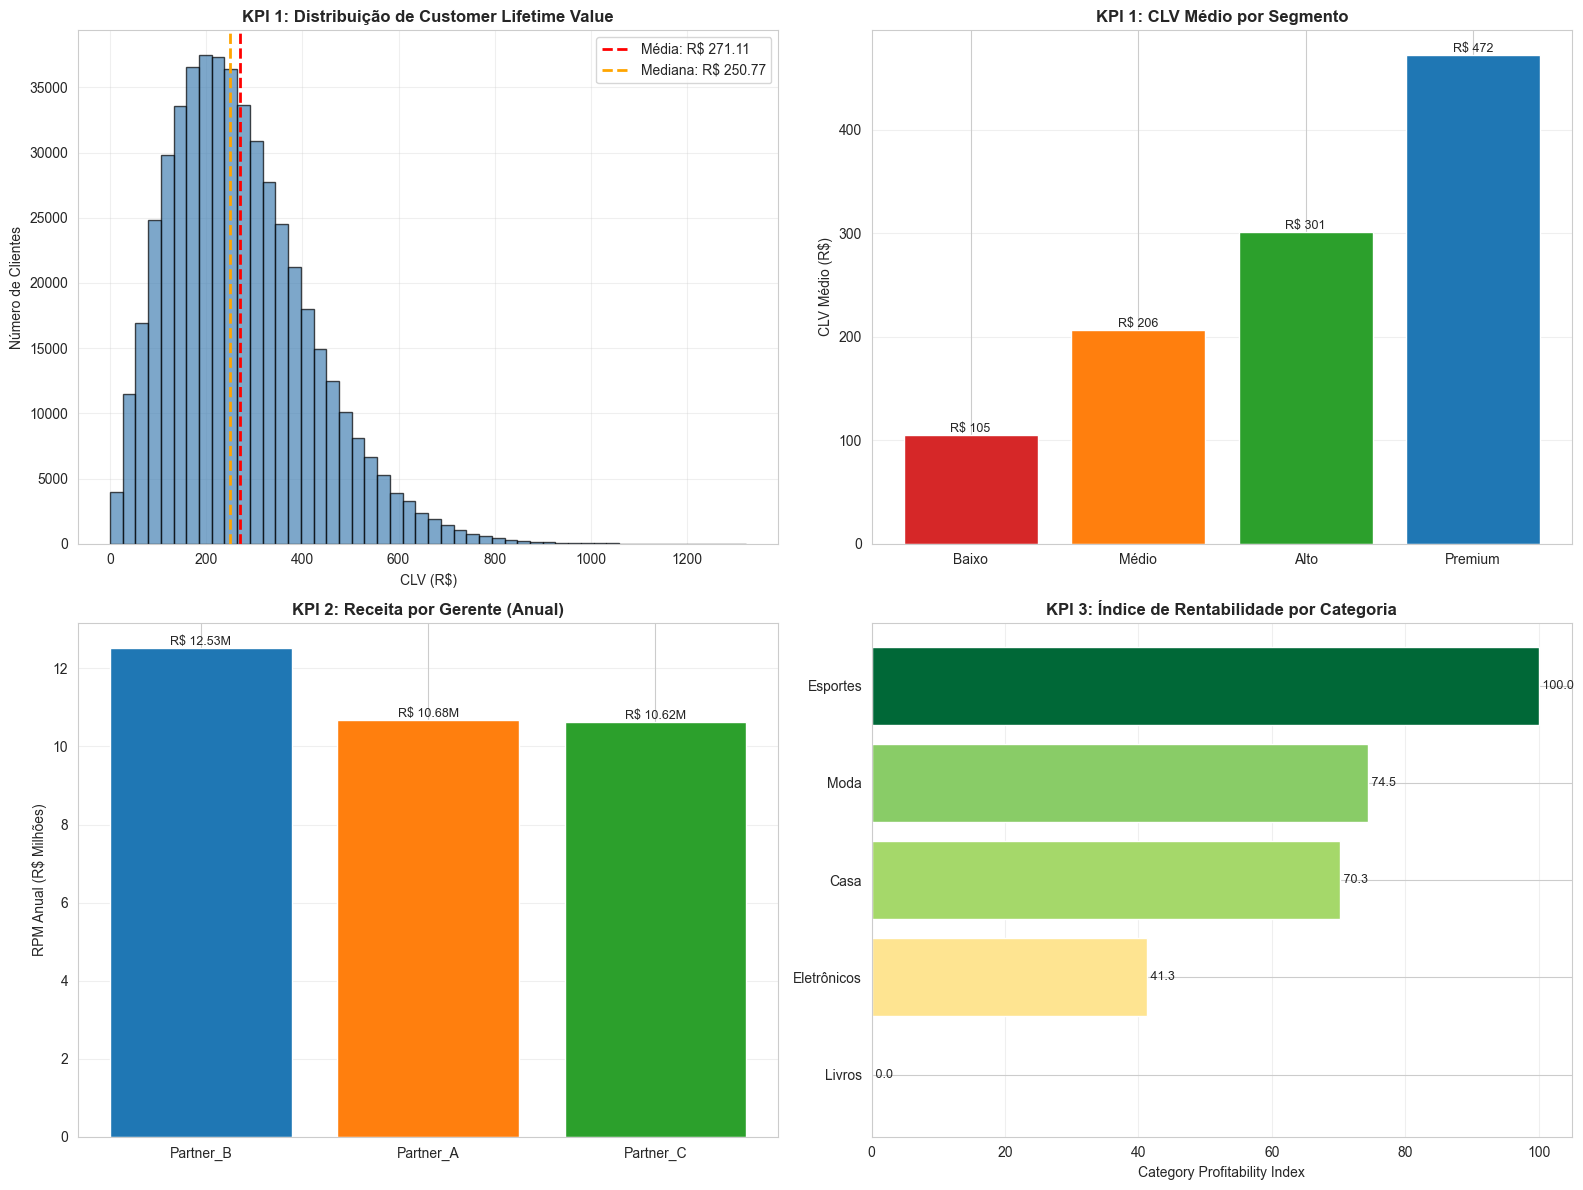

In [43]:
print("="*70)
print("CÁLCULO DE KPIs ESTRATÉGICOS")
print("="*70)


# Adicionar informações temporais
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['year_month'] = df['transaction_date'].dt.to_period('M')
df['quarter'] = df['transaction_date'].dt.quarter

print(f"Período analisado: {df['transaction_date'].min().date()} a {df['transaction_date'].max().date()}")

# ============================================
# KPI 1: CUSTOMER LIFETIME VALUE (CLV)
# ============================================
print("\n" + "="*70)
print("KPI 1: CUSTOMER LIFETIME VALUE (CLV)")
print("="*70)
print("\nDescrição:")
print("  Valor médio que cada cliente gera para a plataforma durante todo")
print("  seu relacionamento. Métrica crucial para avaliar a qualidade da")
print("  base de clientes e orientar investimentos em aquisição e retenção.")

# Calcular CLV por cliente
clv_cliente = df.groupby('customer_id').agg({
    'receita_plataforma': 'sum',
    'transaction_id': 'count',
    'transaction_date': ['min', 'max']
}).reset_index()

clv_cliente.columns = ['customer_id', 'total_revenue', 'num_transactions', 'first_purchase', 'last_purchase']
clv_cliente['lifetime_days'] = (pd.to_datetime(clv_cliente['last_purchase']) - 
                                  pd.to_datetime(clv_cliente['first_purchase'])).dt.days

# Métricas agregadas
media_clv = clv_cliente['total_revenue'].mean()
mediana_clv = clv_cliente['total_revenue'].median()
total_clv = clv_cliente['total_revenue'].sum()

print(f"\nResultados:")
print(f"  • CLV Médio: R$ {media_clv:,.2f}")
print(f"  • CLV Mediano: R$ {mediana_clv:,.2f}")
print(f"  • CLV Total (base): R$ {total_clv:,.2f}")
print(f"  • Número de clientes: {len(clv_cliente):,}")

# Segmentação por valor
clv_cliente['segmento_clv'] = pd.qcut(clv_cliente['total_revenue'], 
                                       q=4, 
                                       labels=['Baixo', 'Médio', 'Alto', 'Premium'])

distribuicao_segmento = clv_cliente['segmento_clv'].value_counts()
print(f"\nDistribuição por Segmento:")
for segmento in ['Premium', 'Alto', 'Médio', 'Baixo']:
    count = distribuicao_segmento.get(segmento, 0)
    pct = (count / len(clv_cliente)) * 100
    avg_rev = clv_cliente[clv_cliente['segmento_clv'] == segmento]['total_revenue'].mean()
    print(f"  • {segmento}: {count:,} clientes ({pct:.1f}%) - CLV médio: R$ {avg_rev:,.2f}")

print(f"\nAplicação Estratégica:")
print(f"  1. Alocar recursos de marketing priorizando segmentos Premium/Alto")
print(f"  2. Desenvolver programas de fidelidade para clientes de alto CLV")
print(f"  3. Identificar características de clientes Premium para aquisição")

# ============================================
# KPI 2: REVENUE PER PARTNER MANAGER (RPM)
# ============================================
print("\n" + "="*70)
print("KPI 2: REVENUE PER PARTNER MANAGER (RPM)")
print("="*70)
print("\nDescrição:")
print("  Receita média gerada por gerente de parceiro. Permite avaliar a")
print("  produtividade dos times de gestão de parceiros e identificar")
print("  oportunidades de melhoria ou necessidade de expansão da equipe.")

# Dados do contexto: 3 parceiros, cada um com 1 gerente + 2 analistas
partner_teams = {
    'Partner_A': {'gerentes': 1, 'analistas': 2},
    'Partner_B': {'gerentes': 1, 'analistas': 2},
    'Partner_C': {'gerentes': 1, 'analistas': 2}
}

# Calcular receita por parceiro
receita_parceiro_v2 = df.groupby('partnership').agg({
    'receita_plataforma': 'sum',
    'transaction_id': 'count',
    'total_value': 'sum'
}).reset_index()

receita_parceiro_v2.columns = ['partnership', 'receita_plataforma', 'num_transactions', 'total_gmv']

# Adicionar informações de equipe
receita_parceiro_v2['quantidade_gerentes'] = receita_parceiro_v2['partnership'].map(
    lambda x: partner_teams[x]['gerentes']
)
receita_parceiro_v2['quantidade_analistas'] = receita_parceiro_v2['partnership'].map(
    lambda x: partner_teams[x]['analistas']
)
receita_parceiro_v2['tamanho_time'] = receita_parceiro_v2['quantidade_gerentes'] + receita_parceiro_v2['quantidade_analistas']

# Calcular RPM (anual)
anos_data = (df['transaction_date'].max() - df['transaction_date'].min()).days / 365.25
receita_parceiro_v2['rpm_anual'] = receita_parceiro_v2['receita_plataforma'] / (receita_parceiro_v2['quantidade_gerentes'] * anos_data)
receita_parceiro_v2['receita_membro_equipe'] = receita_parceiro_v2['receita_plataforma'] / (receita_parceiro_v2['tamanho_time'] * anos_data)

print(f"\nResultados (média anual por {years_in_data:.1f} anos):")
for _, row in receita_parceiro_v2.sort_values('rpm_anual', ascending=False).iterrows():
    print(f"\n  {row['partnership']}:")
    print(f"    • Receita total: R$ {row['receita_plataforma']:,.2f}")
    print(f"    • RPM (por gerente/ano): R$ {row['rpm_anual']:,.2f}")
    print(f"    • Receita por membro do time/ano: R$ {row['receita_membro_equipe']:,.2f}")
    print(f"    • Transações: {row['num_transactions']:,}")

avg_rpm = receita_parceiro_v2['rpm_anual'].mean()
print(f"\n  Média geral RPM: R$ {avg_rpm:,.2f}/gerente/ano")

print(f"\nAplicação Estratégica:")
print(f"  1. Benchmark de produtividade entre times de parceiros")
print(f"  2. Identificar necessidade de reforço em times com baixo RPM")
print(f"  3. Definir metas de receita por gerente para avaliação de performance")

# ============================================
# KPI 3: CATEGORY PROFITABILITY INDEX (CPI)
# ============================================
print("\n" + "="*70)
print("KPI 3: CATEGORY PROFITABILITY INDEX (CPI)")
print("="*70)
print("\nDescrição:")
print("  Índice que combina receita da plataforma, volume e eficiência")
print("  operacional por categoria. Considera custos arbitrados de gestão")
print("  para calcular rentabilidade líquida de cada categoria.")

# Dados do contexto: 5 categorias, cada uma com 1 gerente + 3 analistas
# Arbitrar custos anuais por categoria
category_costs = {
    'Eletrônicos': 800000,  # Maior complexidade técnica
    'Esportes': 600000,
    'Casa': 600000,
    'Moda': 500000,  # Maior volume, processos mais padronizados
    'Livros': 500000
}

# Calcular métricas por categoria
metricas_categoria = df.groupby('category').agg({
    'receita_plataforma': 'sum',
    'transaction_id': 'count',
    'total_value': 'sum'
}).reset_index()

metricas_categoria.columns = ['category', 'receita_plataforma', 'num_transactions', 'total_gmv']

# Adicionar custos e calcular lucro
metricas_categoria['annual_cost'] = metricas_categoria['category'].map(category_costs)
metricas_categoria['total_cost'] = metricas_categoria['annual_cost'] * anos_data
metricas_categoria['net_profit'] = metricas_categoria['receita_plataforma'] - metricas_categoria['total_cost']
metricas_categoria['profit_margin'] = (metricas_categoria['net_profit'] / metricas_categoria['receita_plataforma']) * 100
metricas_categoria['roi'] = (metricas_categoria['net_profit'] / metricas_categoria['total_cost']) * 100

# Calcular CPI (índice normalizado 0-100)
# Combina: 40% lucro líquido + 30% margem + 30% ROI
metricas_categoria['profit_score'] = (metricas_categoria['net_profit'] - metricas_categoria['net_profit'].min()) / \
                                    (metricas_categoria['net_profit'].max() - metricas_categoria['net_profit'].min()) * 100
metricas_categoria['margin_score'] = (metricas_categoria['profit_margin'] - metricas_categoria['profit_margin'].min()) / \
                                    (metricas_categoria['profit_margin'].max() - metricas_categoria['profit_margin'].min()) * 100
metricas_categoria['roi_score'] = (metricas_categoria['roi'] - metricas_categoria['roi'].min()) / \
                                 (metricas_categoria['roi'].max() - metricas_categoria['roi'].min()) * 100

metricas_categoria['CPI'] = (0.4 * metricas_categoria['profit_score'] + 
                           0.3 * metricas_categoria['margin_score'] + 
                           0.3 * metricas_categoria['roi_score'])

print(f"\nResultados (período de {years_in_data:.1f} anos):")
for _, row in metricas_categoria.sort_values('CPI', ascending=False).iterrows():
    print(f"\n  {row['category']}:")
    print(f"    • Receita: R$ {row['receita_plataforma']:,.2f}")
    print(f"    • Custo estimado: R$ {row['total_cost']:,.2f}")
    print(f"    • Lucro líquido: R$ {row['net_profit']:,.2f}")
    print(f"    • Margem: {row['profit_margin']:.2f}%")
    print(f"    • ROI: {row['roi']:.2f}%")
    print(f"    • CPI: {row['CPI']:.1f}/100")

print(f"\nAplicação Estratégica:")
print(f"  1. Priorizar investimentos em categorias com maior CPI")
print(f"  2. Revisar estrutura de custos de categorias com CPI baixo")
print(f"  3. Considerar ajustes nas taxas de comissão por categoria")
print(f"  4. Avaliar expansão de equipe em categorias altamente rentáveis")


# ============================================
# VISUALIZAÇÕES DOS KPIs
# ============================================
print("\nCriando visualizações dos KPIs...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# KPI 1: Distribuição de CLV
axes[0, 0].hist(clv_cliente['total_revenue'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(media_clv, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {avg_clv:.2f}')
axes[0, 0].axvline(mediana_clv, color='orange', linestyle='--', linewidth=2, label=f'Mediana: R$ {median_clv:.2f}')
axes[0, 0].set_xlabel('CLV (R$)')
axes[0, 0].set_ylabel('Número de Clientes')
axes[0, 0].set_title('KPI 1: Distribuição de Customer Lifetime Value', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# KPI 1b: CLV por segmento
media_segmento = clv_cliente.groupby('segmento_clv')['total_revenue'].mean().reindex(['Baixo', 'Médio', 'Alto', 'Premium'])
axes[0, 1].bar(range(len(media_segmento)), media_segmento.values, color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'])
axes[0, 1].set_xticks(range(len(media_segmento)))
axes[0, 1].set_xticklabels(media_segmento.index)
axes[0, 1].set_ylabel('CLV Médio (R$)')
axes[0, 1].set_title('KPI 1: CLV Médio por Segmento', fontsize=12, fontweight='bold')
for i, v in enumerate(media_segmento.values):
    axes[0, 1].text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontsize=9)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# KPI 2: RPM por parceiro
rpm_data = receita_parceiro_v2.sort_values('rpm_anual', ascending=False)
axes[1, 0].bar(range(len(rpm_data)), rpm_data['rpm_anual'].values / 1e6, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_xticks(range(len(rpm_data)))
axes[1, 0].set_xticklabels(rpm_data['partnership'].values)
axes[1, 0].set_ylabel('RPM Anual (R$ Milhões)')
axes[1, 0].set_title('KPI 2: Receita por Gerente (Anual)', fontsize=12, fontweight='bold')
for i, v in enumerate(rpm_data['rpm_anual'].values):
    axes[1, 0].text(i, v / 1e6, f'R$ {v/1e6:.2f}M', ha='center', va='bottom', fontsize=9)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# KPI 3: CPI por categoria
cpi_data = metricas_categoria.sort_values('CPI', ascending=False)
cores_cpi = plt.cm.RdYlGn(cpi_data['CPI'] / 100)
axes[1, 1].barh(range(len(cpi_data)), cpi_data['CPI'].values, color=cores_cpi)
axes[1, 1].set_yticks(range(len(cpi_data)))
axes[1, 1].set_yticklabels(cpi_data['category'].values)
axes[1, 1].set_xlabel('Category Profitability Index')
axes[1, 1].set_title('KPI 3: Índice de Rentabilidade por Categoria', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
for i, v in enumerate(cpi_data['CPI'].values):
    axes[1, 1].text(v, i, f' {v:.1f}', va='center', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()


print("\n" + "="*70)
print("CÁLCULO DE KPIs CONCLUÍDO COM SUCESSO!")
print("="*70)

plt.show()